In [1]:
import pandas as pd
import numpy as np
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from pandas import datetime
import os
import time
import math
from chinese_calendar import is_workday
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

D:\anaconda3\envs\tensorflow2.3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [2]:
def parser(x):
    return datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

In [3]:
series = read_csv('data2/test3W.csv', header=None,names=["date","energy","t1","t2","t3","t4","t5"],parse_dates=[0], index_col=0, date_parser=parser)

In [4]:
series=series['energy']

In [5]:
def difference(dataset,interval=1):
    diff = list()
    for i in range(interval,len(dataset)):
        value = dataset[i]-dataset[i-interval]
        diff.append(value)
    return Series(diff)#建立索引

In [6]:
a=series.diff(1)

In [7]:
b=a.shift(-1)

In [8]:
b,series

(date
 2015-01-01 00:00:00     4.84
 2015-01-01 01:00:00     1.99
 2015-01-01 02:00:00    -2.38
 2015-01-01 03:00:00    -5.64
 2015-01-01 04:00:00    -5.84
                        ...  
 2016-12-31 19:00:00   -11.89
 2016-12-31 20:00:00    -2.52
 2016-12-31 21:00:00    -7.31
 2016-12-31 22:00:00    -4.90
 2016-12-31 23:00:00      NaN
 Name: energy, Length: 17520, dtype: float64,
 date
 2015-01-01 00:00:00    109.16
 2015-01-01 01:00:00    114.00
 2015-01-01 02:00:00    115.99
 2015-01-01 03:00:00    113.61
 2015-01-01 04:00:00    107.97
                         ...  
 2016-12-31 19:00:00     87.26
 2016-12-31 20:00:00     75.37
 2016-12-31 21:00:00     72.85
 2016-12-31 22:00:00     65.54
 2016-12-31 23:00:00     60.64
 Name: energy, Length: 17520, dtype: float64)

In [9]:
precent = []
for i in range(len(series)-1):
    a= b[i]/min(series[i],series[i+1])
    precent.append(a)

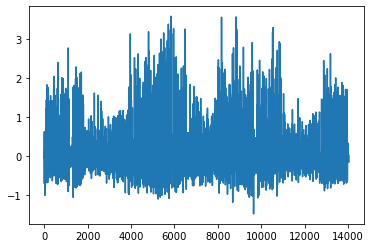

In [10]:
precent =precent[:int(len(precent)*0.8)]
plt.plot(precent)

D:\anaconda3\envs\tensorflow2.3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

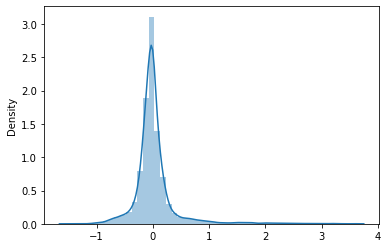

In [11]:
sns.distplot(precent)

In [21]:
precent = np.array(precent)

In [22]:
precent = np.reshape(precent,-1)

In [23]:
bins=np.linspace(0.5,4,100)

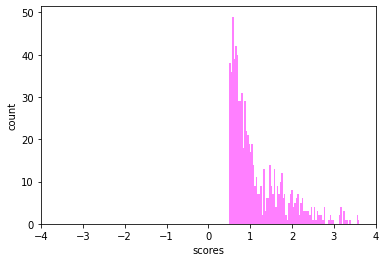

In [24]:
plt.hist(precent,bins,color='fuchsia',alpha=0.5)#alpha设置透明度，0为完全透明

plt.xlabel('scores')
plt.ylabel('count')
plt.xlim(-4,4)#设置x轴分布范围

plt.show()

In [25]:
# 定义3σ法则识别波动值函数
def three_sigma(Ser1):
    '''
    Ser1：表示传入DataFrame的某一列。
    '''
    rule = (Ser1.mean()-1.75*Ser1.std()>Ser1) | (Ser1.mean()+1.75*Ser1.std()< Ser1)
    index = np.arange(Ser1.shape[0])[rule]
    outrange = Ser1[index]
    return outrange

In [26]:
# 导入数据并调用three_sigma

print(three_sigma(precent).mean())

0.676431287755897


In [27]:
positive = []
negative = []
c = three_sigma(precent)
for i in range (len(c)):
    if c[i] > 0:
        positive.append(c[i])
    else:
        negative.append(c[i])

In [28]:
positive = np.array(positive)
positive.mean()

1.3334689652249265

In [29]:
negative = np.array(negative)
negative.mean()

-0.7798387884254596

In [30]:
np.max(positive)

3.5831930415263757